In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os

In [4]:
directory="E:\Projects\Emotion Detector\Datasets"

In [5]:
os.listdir(directory)

['test', 'train']

In [6]:
train={}
test={}
for dirs in os.listdir(directory):
    path=os.path.join(directory,dirs)
    for emotion in os.listdir(path):
        if dirs=='train':
            train[emotion]=len(os.listdir(os.path.join(path,emotion)))
        else:
            test[emotion]=len(os.listdir(os.path.join(path,emotion)))

In [7]:
train

{'angry': 3995,
 'disgust': 436,
 'fear': 4097,
 'happy': 7215,
 'neutral': 4965,
 'sad': 4830,
 'surprise': 3171}

In [8]:
test

{'angry': 958,
 'disgust': 111,
 'fear': 1024,
 'happy': 1774,
 'neutral': 1233,
 'sad': 1247,
 'surprise': 831}

In [9]:
import pandas as pd
df=pd.DataFrame(train.values(),index=train.keys())

In [10]:
df=df.rename(columns={0:'train'})

In [11]:
df['test']=test.values()

In [12]:
df=df.T

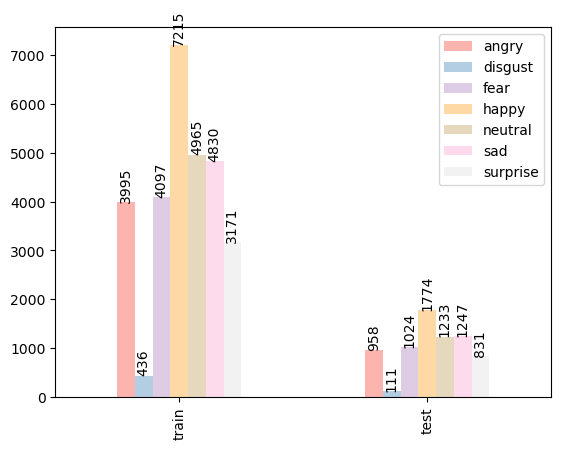

In [13]:
ax=df.plot(kind='bar',cmap='Pastel1')
for bars in ax.containers:
    ax.bar_label(bars,rotation=90)

In [14]:
directory

'E:\\Projects\\Emotion Detector\\Datasets'

In [15]:
train_dir=os.path.join(directory,'train')

In [16]:
test_dir=os.path.join(directory,'test')

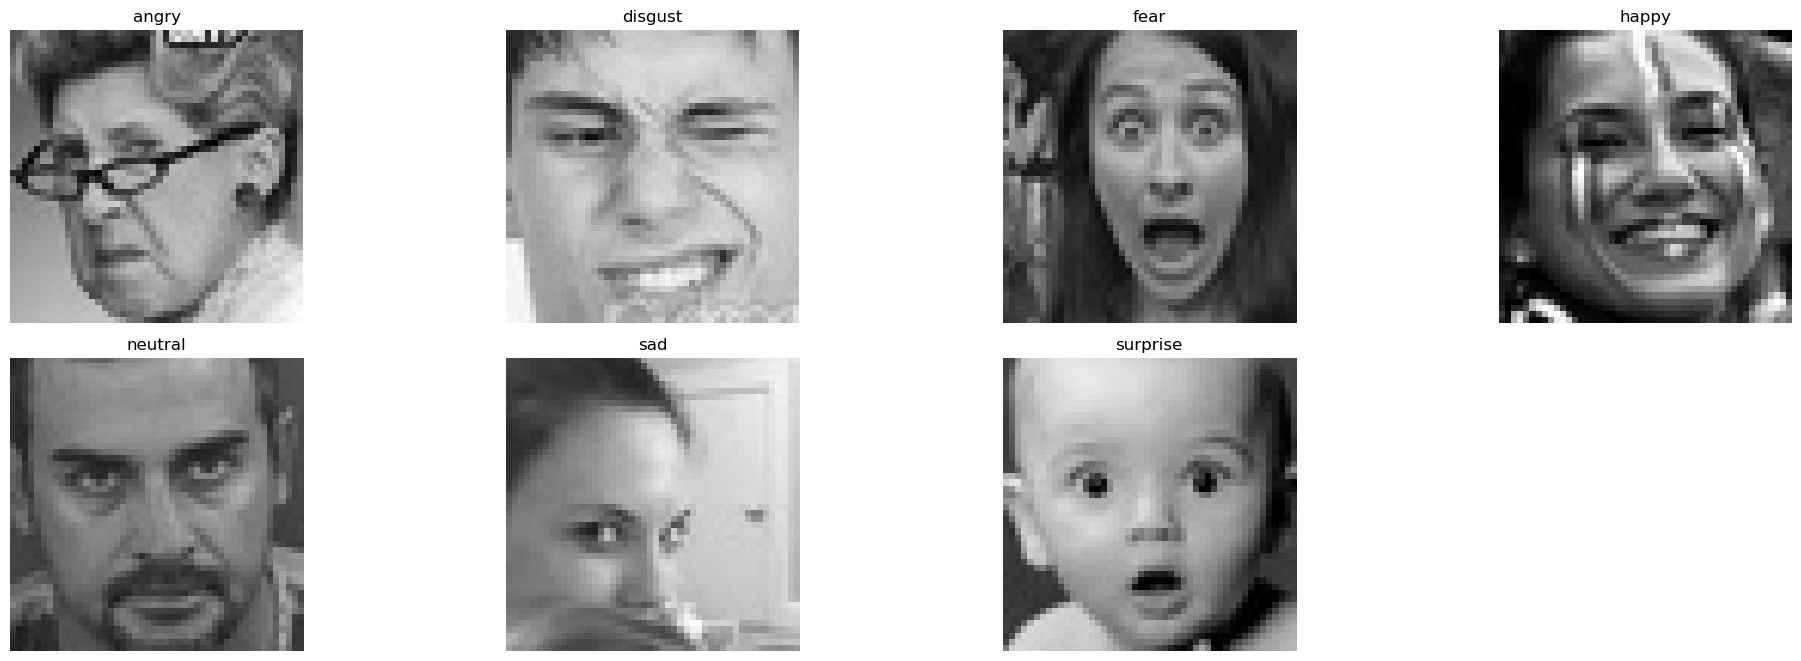

In [17]:
plt.figure(figsize=(20,10))
i=1
import cv2 as cv
for emotion in os.listdir(train_dir):
    emotion_path=os.path.join(train_dir,emotion)
    image=os.listdir(emotion_path)[81]
    image_path=os.path.join(emotion_path,image)
    plt.subplot(3,4,i)
    i+=1
    img=cv.imread(image_path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.title(emotion)


In [18]:
def plot(directory,emotion,num_images=9):
    num_images=num_images
    size=int(np.ceil(np.sqrt(num_images)))
    plt.figure(figsize=(20,20))
    emotion_path=os.path.join(directory,emotion)
    paths=[]
    for i in range(0,num_images):
        x=np.random.randint(len(os.listdir(emotion_path)))
        image=os.listdir(emotion_path)[x]
        image_path=os.path.join(emotion_path,image)
        paths.append(image_path)
    c=1
    for path in paths:
        image=cv.imread(path)
        image=cv.cvtColor(image,cv.COLOR_BGR2RGB)
        plt.subplot(size,size,c)
        plt.imshow(image)
        plt.title(emotion+' '+str(c))
        c+=1
        plt.axis('off')

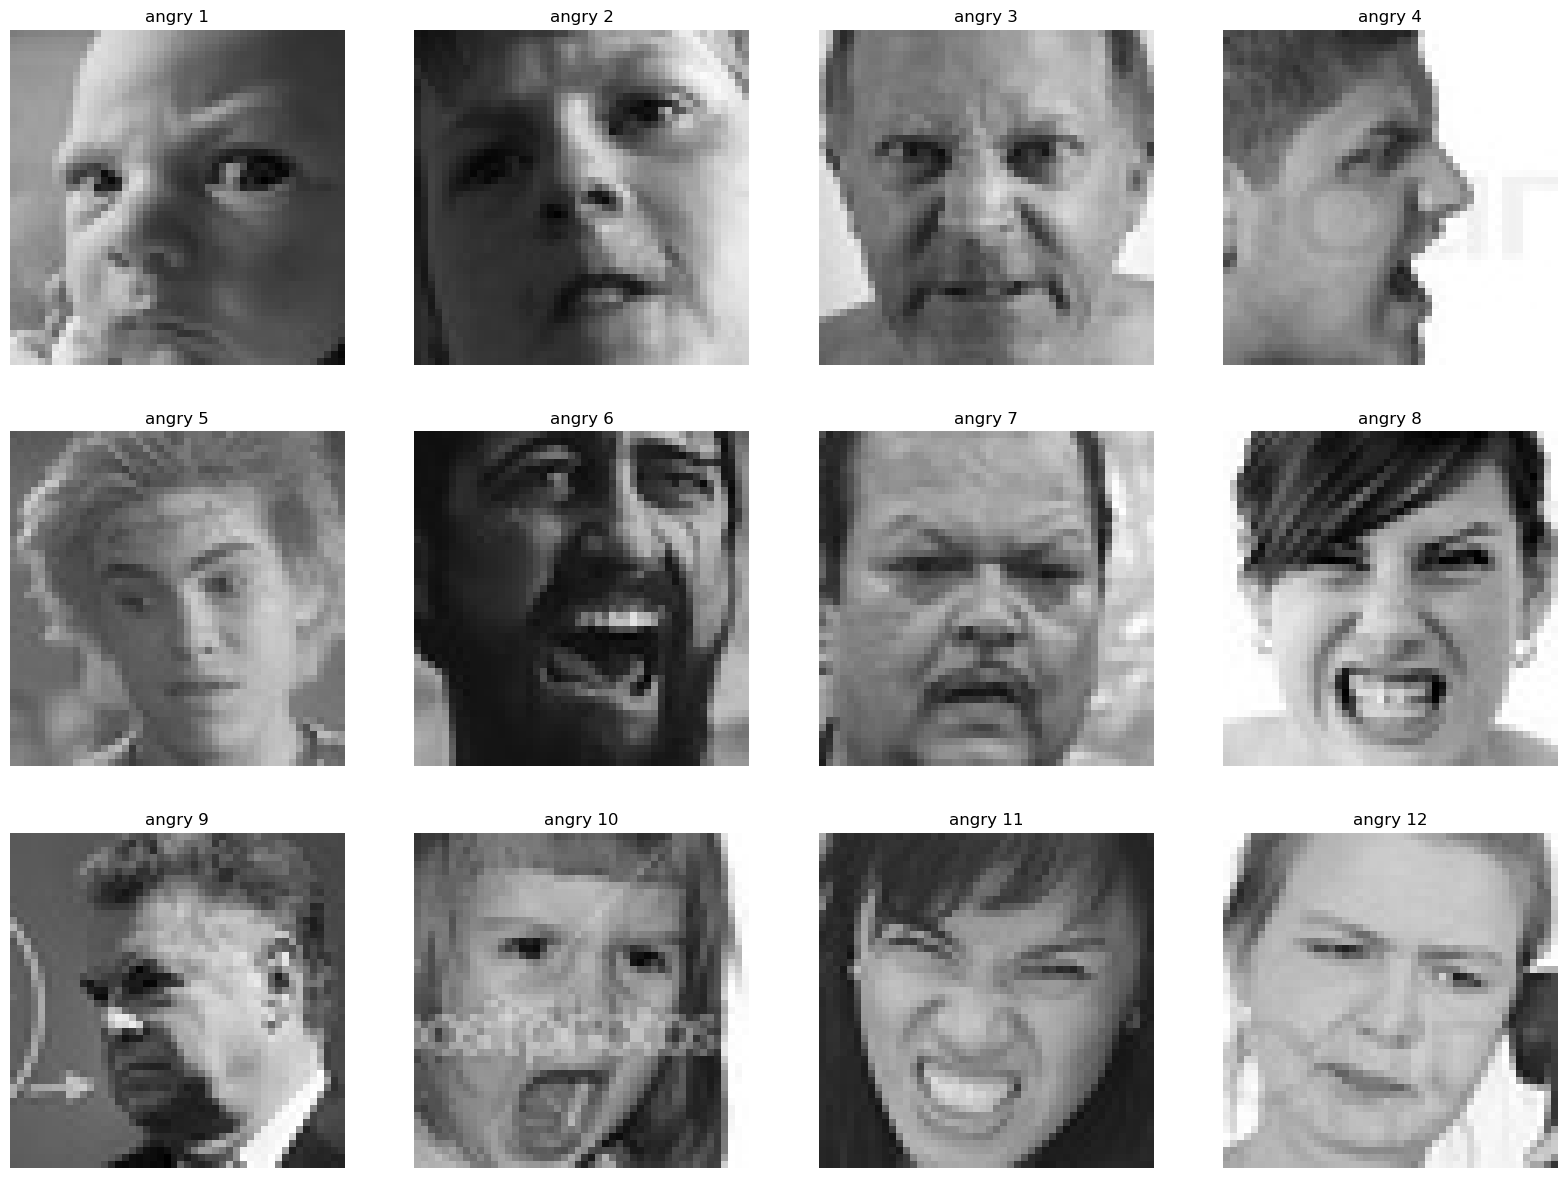

In [19]:
plot(train_dir,'angry',12)

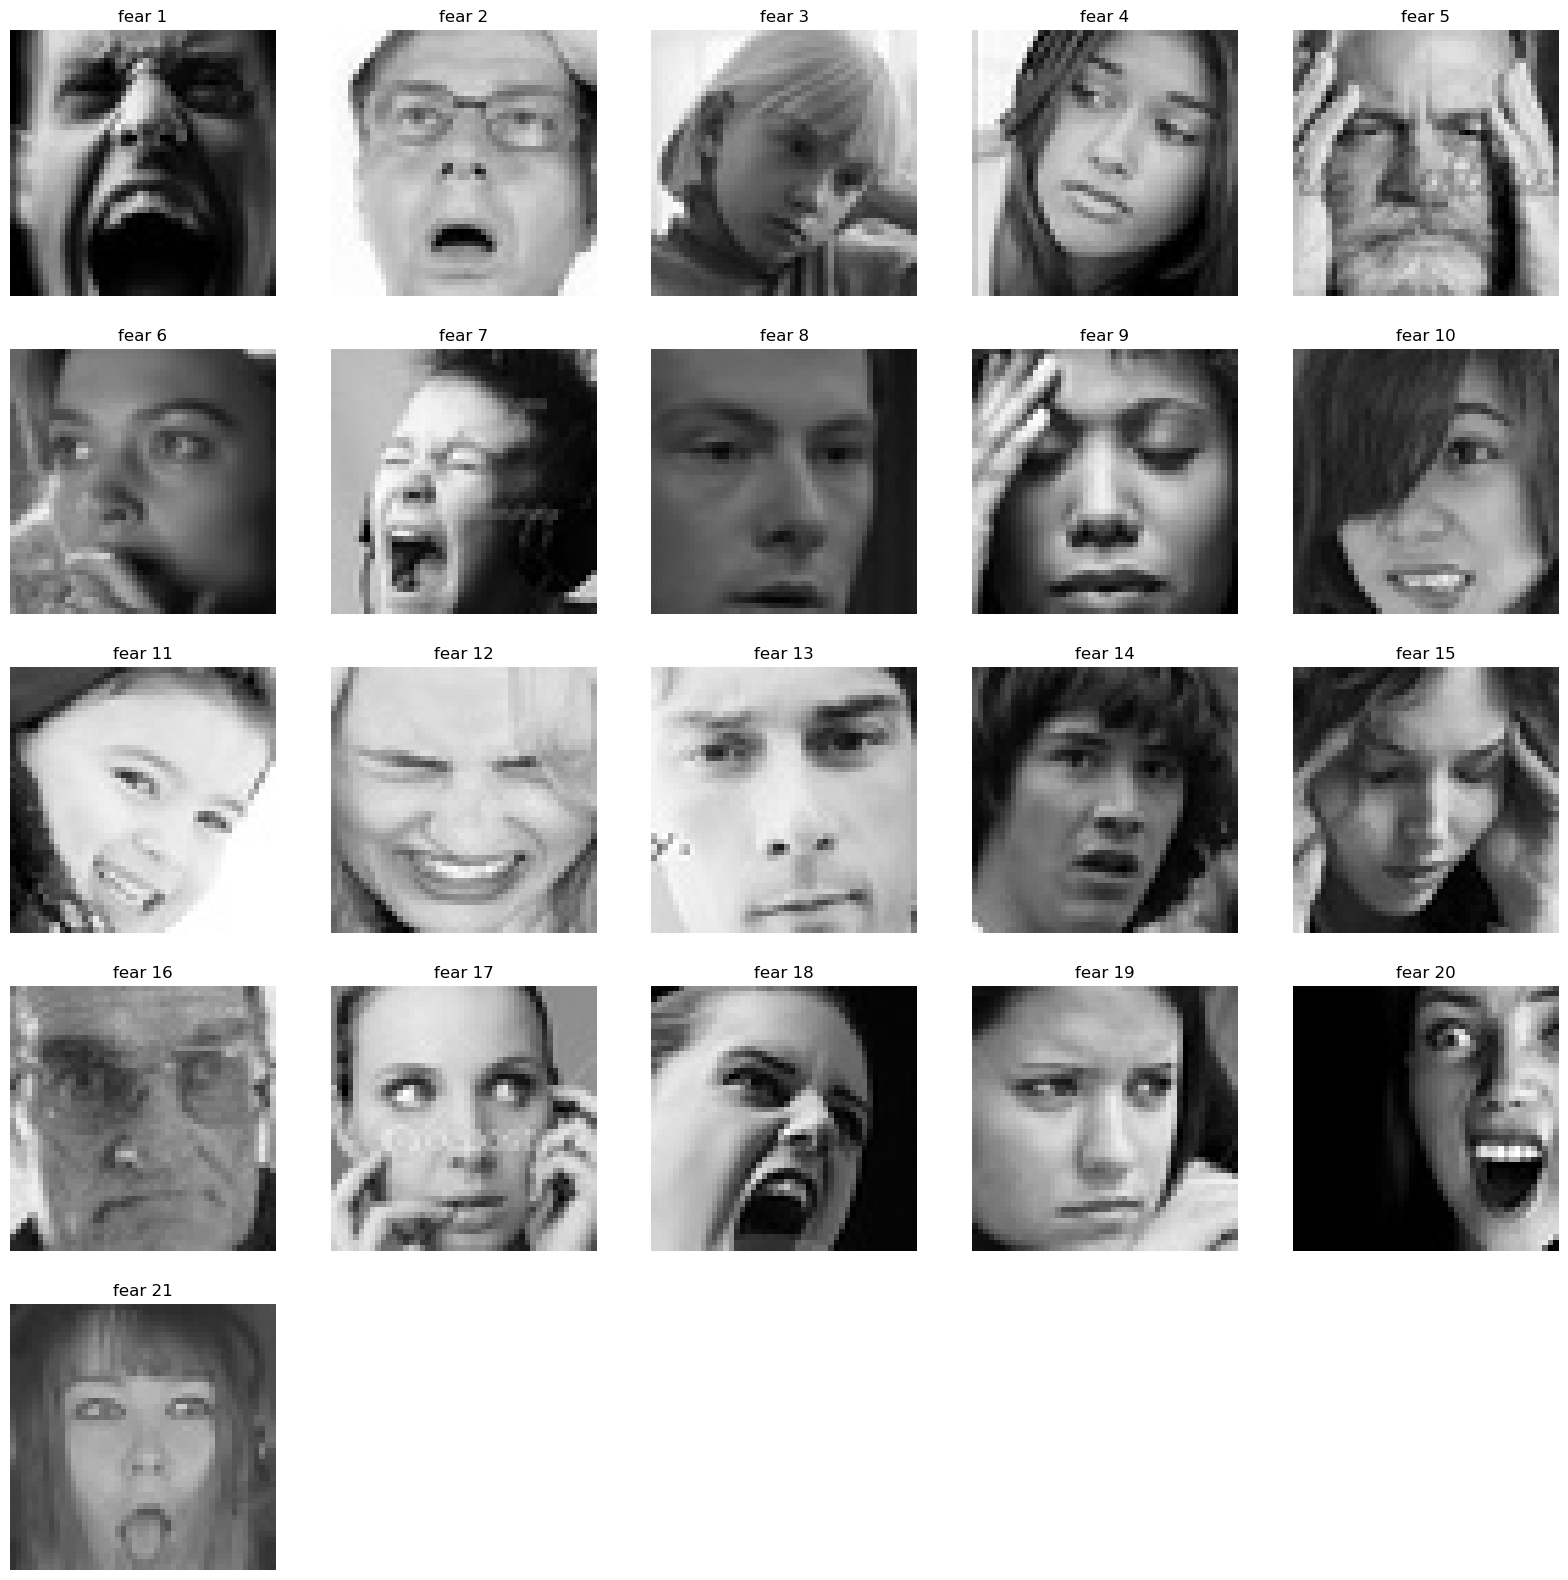

In [20]:
plot(test_dir,'fear',21)

In [21]:
emotion_path=os.path.join(train_dir,'angry')
image_name=os.listdir(emotion_path)[45]
image_path=os.path.join(emotion_path,image_name)

In [22]:
image=cv.imread(image_path)

In [23]:
image.shape

(48, 48, 3)

In [24]:
image=cv.imread(image_path,cv.IMREAD_GRAYSCALE)

In [25]:
image.shape

(48, 48)

In [26]:
image_width=48
image_height=48
batch_size=32
epochs=50
num_classes=7

In [69]:
data=ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=50,width_shift_range=0.3,height_shift_range=0.25,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [70]:
training_data=data.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical',color_mode='rgb',subset='training')

Found 22968 images belonging to 7 classes.


In [71]:
validation_data=data.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical',color_mode='rgb',subset='validation')

Found 5741 images belonging to 7 classes.


In [72]:
testing_data=ImageDataGenerator(rescale=1./255).flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical',color_mode='rgb')

Found 7178 images belonging to 7 classes.


Printing Augmented Images

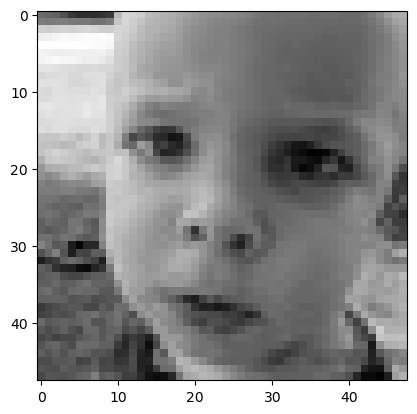

In [31]:
plt.imshow(image,cmap='gray')

In [32]:
img_arr=np.array(image)

In [33]:
img_arr.shape

(48, 48)

In [34]:
img_arr=img_arr.reshape((1,)+img_arr.shape+(1,))

In [35]:
img_arr.shape

(1, 48, 48, 1)

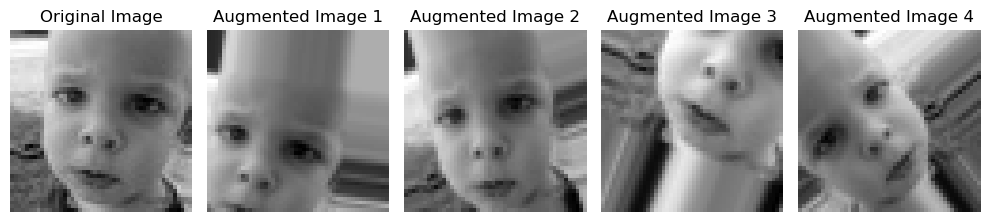

In [36]:
fig,axes=plt.subplots(1,5,figsize=(10,5))
axes[0].imshow(img_arr[0,:,:],cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Image')

for i,ax in enumerate(axes.flat[1:]):
    augmented_batch=data.flow(img_arr,batch_size=1)
    aug_image=next(augmented_batch)[0]
    ax.imshow(aug_image,cmap='gray')
    ax.set_title(f'Augmented Image {i+1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [37]:
from sklearn.utils.class_weight import compute_class_weight

In [38]:
classes=training_data.classes

In [39]:
np.unique(classes)

array([0, 1, 2, 3, 4, 5, 6])

In [40]:
training_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [41]:
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(classes),y=classes)

In [42]:
class_weights

array([1.02664044, 9.40155546, 1.00095877, 0.56845857, 0.82606819,
       0.84915705, 1.29331607])

In [43]:
weight_dict=dict(enumerate(class_weights))

In [44]:
weight_dict

{0: 1.0266404434114071,
 1: 9.401555464592715,
 2: 1.0009587727708533,
 3: 0.5684585684585685,
 4: 0.826068191627104,
 5: 0.8491570541259982,
 6: 1.2933160650937552}

In [45]:
tf.keras.backend.clear_session()

In [46]:
vgg=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

In [47]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [48]:
vgg.layers

In [49]:
for layer in vgg.layers[:-3]:
    layer.trainable=False

In [50]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [51]:
from tensorflow.keras.layers import Flatten,Dense,Dropout
x=Flatten()(vgg.output)
dense1=Dense(1024,activation='relu',kernel_initializer='he_normal')(x)
drop1=Dropout(0.5)(dense1)
dense2=Dense(512,activation='relu',kernel_initializer='he_normal')(drop1)
drop2=Dropout(0.5)(dense2)
output=Dense(7,activation='softmax',kernel_initializer='he_normal')(drop2)

In [52]:
from tensorflow.keras.models import Model

In [53]:
model=Model(inputs=vgg.input,outputs=output)

In [54]:
import tensorflow.keras
model.compile(loss='categorical_crossentropy',optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False),metrics=['accuracy'])

In [55]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,CSVLogger

In [57]:
es=EarlyStopping(restore_best_weights=True,monitor='val_loss',min_delta=0,patience=5,verbose=1)

In [58]:
lr=ReduceLROnPlateau(monitor='val_loss',patience=5,factor=0.2,min_delta=0,verbose=1)

In [59]:
file="E:\Projects\Emotion Detector\Models"
checkpoint=os.path.join(file,'VGG16.keras')
check=ModelCheckpoint(filepath=checkpoint,monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [60]:
csv=CSVLogger(os.path.join(file,'training.log'))

In [61]:
cb=[check,es,lr,csv]

In [73]:
history=model.fit(training_data,epochs=50,class_weight=weight_dict,validation_data=validation_data,callbacks=cb)

Epoch 1/50
718/718 [==============================] - ETA: 0s - loss: 1.9604 - accuracy: 0.1060
Epoch 1: val_loss improved from inf to 1.93426, saving model to E:\Projects\Emotion Detector\Models\VGG16.keras
718/718 [==============================] - 1925s 3s/step - loss: 1.9604 - accuracy: 0.1060 - val_loss: 1.9343 - val_accuracy: 0.1730 - lr: 0.0010
Epoch 2/50
718/718 [==============================] - ETA: 0s - loss: 1.9469 - accuracy: 0.1487
Epoch 2: val_loss did not improve from 1.93426
718/718 [==============================] - 1893s 3s/step - loss: 1.9469 - accuracy: 0.1487 - val_loss: 1.9543 - val_accuracy: 0.0152 - lr: 0.0010
Epoch 3/50
718/718 [==============================] - ETA: 0s - loss: 1.9471 - accuracy: 0.1267
Epoch 3: val_loss did not improve from 1.93426
718/718 [==============================] - 1842s 3s/step - loss: 1.9471 - accuracy: 0.1267 - val_loss: 1.9536 - val_accuracy: 0.0152 - lr: 0.0010
Epoch 4/50
718/718 [==============================] - ETA: 0s - loss

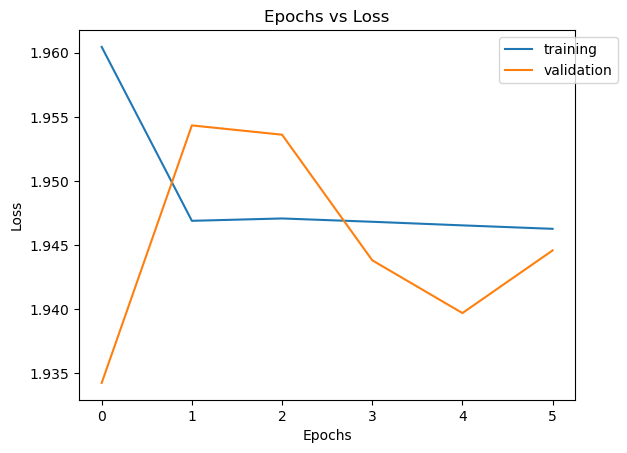

In [74]:
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.title('Epochs vs Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

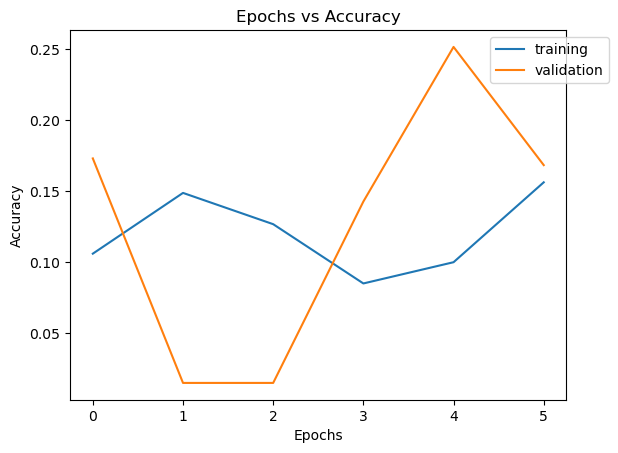

In [75]:
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.title('Epochs vs Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.1,1))
plt.show()

In [76]:
train_loss,train_accuracy=model.evaluate(training_data)
test_loss,test_accuracy=model.evaluate(testing_data)

225/225 [==============================] - 385s 2s/step - loss: 1.9341 - accuracy: 0.1718


In [77]:
train_loss


1.9342665672302246

In [78]:
train_accuracy

0.17293626070022583

In [79]:
test_loss

1.9341480731964111

In [80]:
test_accuracy

0.17177486419677734

In [81]:
true_classes=testing_data.classes

In [83]:
predicted_classes=np.argmax(model.predict(testing_data),axis=1)

225/225 [==============================] - 448s 2s/step


In [84]:
class_labels=list(testing_data.class_indices.keys())

In [85]:
cm=confusion_matrix(true_classes,predicted_classes)

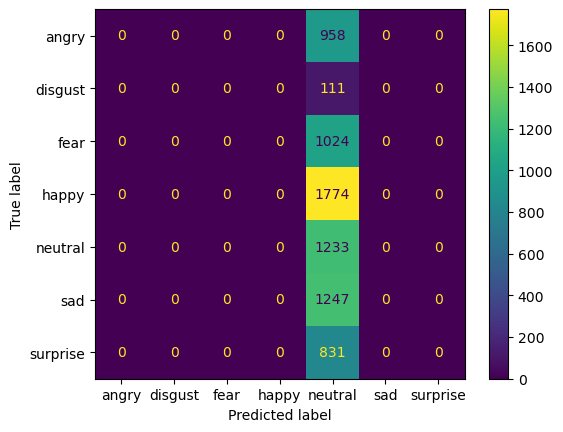

In [86]:
ConfusionMatrixDisplay(cm,display_labels=class_labels).plot()

In [87]:
report=classification_report(true_classes,predicted_classes,target_names=class_labels,zero_division=0)

In [88]:
print('Classification Report:\n',report)

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       958
     disgust       0.00      0.00      0.00       111
        fear       0.00      0.00      0.00      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.17      1.00      0.29      1233
         sad       0.00      0.00      0.00      1247
    surprise       0.00      0.00      0.00       831

    accuracy                           0.17      7178
   macro avg       0.02      0.14      0.04      7178
weighted avg       0.03      0.17      0.05      7178

